In [1]:
import pandas as pd
import numpy as np
import time
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

from sklearn.ensemble import AdaBoostRegressor
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR


from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve 
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv('DatasetPerovskitasJuan.csv') #Aqui lo que se hace es cargar los datos.
#df = shuffle(df, random_state=2)
x = df.drop('Unnamed: 0', axis = 1)
x = x.drop('ID', axis = 1)
x = x.drop('full_formula', axis = 1)
x = x.drop('Energy', axis = 1)
x = x.drop('Energy_per_atom', axis = 1)
x = x.drop('Formation_energy_per_atom', axis = 1)
x = x.drop('E_above_hull', axis = 1)
x = x.drop("Band_gap",axis = 1) #Aqui quitamos la columna que correponde a la energia de gap
y = np.asarray(df['Band_gap']) #Aqui definimos la cantidad que deseamos predecir, en este caso la energia de gap
x = (x-x.mean())/x.std()
y = (y-y.mean())/y.std()
x = x.fillna(0)

X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.1, random_state=9)

In [3]:
y.mean()

-3.1181250060783334e-17

In [4]:
y.std()

0.9999999999999999

In [5]:
X_train

,Nsites,Nelements,A Z,A Period_Number,A Group_Number,A Electronegativity,A Covalent_radius,A Valence_Electrons,A Ionization_Energy,A Electron_Afinity,...,X6 Covalent_radius,X6 Valence_Electrons,X6 Ionization_Energy,X6 Electron_Afinity,X6 Block,X6 Volume,X6 Density,X6 Atomic_Weight,volume-py,density-py
25,-0.920080,-0.552907,-0.821722,-0.864229,0.614755,1.390634,-1.451364,-0.375280,1.289069,0.859375,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,-0.813689,0.047271
1285,1.086266,-0.552907,0.576317,0.793308,-0.454817,-0.402111,0.876705,-0.375280,-0.683598,0.396249,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,0.656473,-1.100523
367,-0.920080,-0.552907,-0.262506,-0.035460,-0.668732,-0.126304,0.388098,-0.375280,-0.133066,-0.162396,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,-0.480346,-1.251083
1615,1.086266,1.807630,0.576317,0.793308,-0.454817,-0.402111,0.876705,-0.375280,-0.683598,0.396249,...,1.497710,1.702615,1.726914,2.279874,1.807630,1.156195,1.910338,1.322502,0.264490,0.560053
74,1.086266,-0.552907,1.275337,0.793308,-0.454817,0.057567,-0.043026,-0.375280,0.384930,-1.051020,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,-0.094783,0.628162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,1.086266,-0.552907,-1.427539,-1.692997,1.684327,1.436602,-1.882488,1.374427,1.520240,2.957915,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,-0.238754,-0.943351
501,-0.920080,-0.552907,0.250108,-0.035460,1.684327,1.574505,-1.077723,1.374427,0.829294,2.167707,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,-0.855597,0.452416
638,1.086266,-0.552907,-0.868323,-0.864229,0.400840,1.275714,-1.278914,-0.375280,1.307905,-0.579210,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,-0.159192,-0.326621
348,1.086266,-0.552907,-1.101329,-0.864229,-0.668732,0.195470,-0.186734,-0.375280,0.159751,-0.506846,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,-0.056424,0.961690


In [6]:
X_test

,Nsites,Nelements,A Z,A Period_Number,A Group_Number,A Electronegativity,A Covalent_radius,A Valence_Electrons,A Ionization_Energy,A Electron_Afinity,...,X6 Covalent_radius,X6 Valence_Electrons,X6 Ionization_Energy,X6 Electron_Afinity,X6 Block,X6 Volume,X6 Density,X6 Atomic_Weight,volume-py,density-py
701,-0.920080,-0.552907,0.809324,0.793308,0.614755,-0.241224,0.618031,-0.375280,-0.627089,0.454140,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,-0.639987,0.577608
1143,-0.920080,-0.552907,0.529716,0.793308,-0.882646,-0.884773,1.106638,-0.375280,-0.996108,-0.632469,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,0.591235,-1.448535
134,-0.920080,-0.552907,1.787951,0.793308,1.898241,1.712409,-0.819049,2.249281,0.783059,1.684319,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,-0.638203,2.233624
1162,-0.920080,-0.552907,0.529716,0.793308,-0.882646,-0.884773,1.106638,-0.375280,-0.996108,-0.632469,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,0.104744,-0.784612
1186,-0.920080,-0.552907,-0.728519,-0.864229,1.042583,1.436602,-1.278914,-0.375280,1.157215,2.500578,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,-0.501515,-0.736876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,-0.920080,-0.552907,1.368539,0.793308,-0.026989,2.493862,-0.416666,-0.375280,1.373832,1.308029,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,-0.690792,1.228078
1779,1.086266,1.807630,-0.262506,-0.035460,-0.668732,-0.126304,0.388098,-0.375280,-0.133066,-0.162396,...,1.497710,1.702615,1.726914,2.279874,1.807630,1.156195,1.910338,1.322502,0.071276,0.028605
782,-0.920080,-0.552907,-1.893552,-2.521765,-0.882646,0.678133,-2.313612,-0.375280,2.523697,-1.051020,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,-0.829311,-0.699565
1602,1.086266,1.807630,0.576317,0.793308,-0.454817,-0.402111,0.876705,-0.375280,-0.683598,0.396249,...,1.497710,1.702615,1.726914,2.279874,1.807630,1.156195,1.910338,1.322502,0.305884,1.193183


In [7]:
abr1 = GridSearchCV (AdaBoostRegressor (),{
    'random_state':[0,1,2], 'n_estimators':[1000], 'learning_rate':[0.001], 'loss': ['exponential']}, cv=5)
abr1.fit(X_train, y_train)
model = abr1.best_estimator_

Primero vemos las metricas
Model| R2 sq on train set: 0.4584
Model| R2 sq on test set: 0.4500
Model| MSE on test set: 0.5995
Model| MAE on test set: 0.5754
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

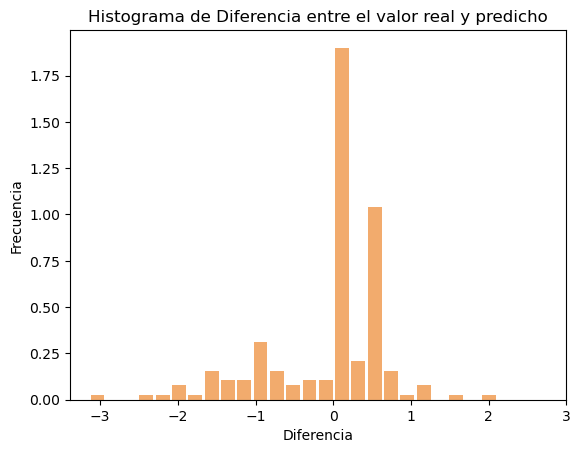

In [8]:
print('Primero vemos las metricas')
abr_score = model.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

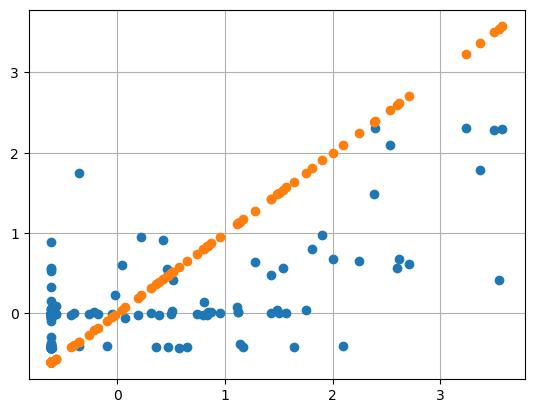

In [9]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [10]:
BR = GridSearchCV (linear_model.BayesianRidge(),{'tol':[1e-3]}, cv=5)
BR.fit(X_train, y_train) #Entrenamos el modelo
model1 = BR.best_estimator_ #Nos quedamos con el mejor modelo

Primero vemos las metricas
Model| R2 sq on train set: 0.4050
Model| R2 sq on test set: 0.3935
Model| MSE on test set: 0.6611
Model| MAE on test set: 0.6122
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

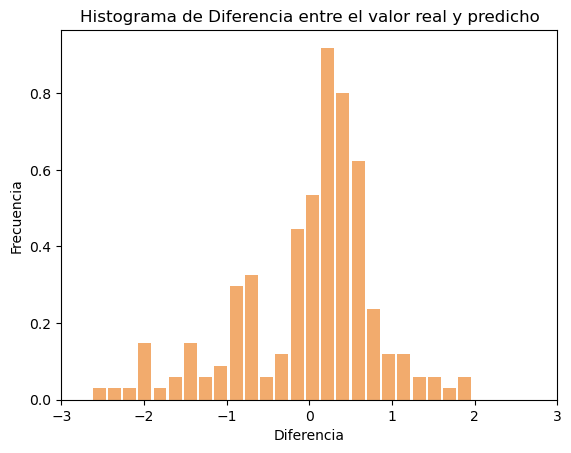

In [11]:
print('Primero vemos las metricas')
abr_score = model1.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model1.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model1.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

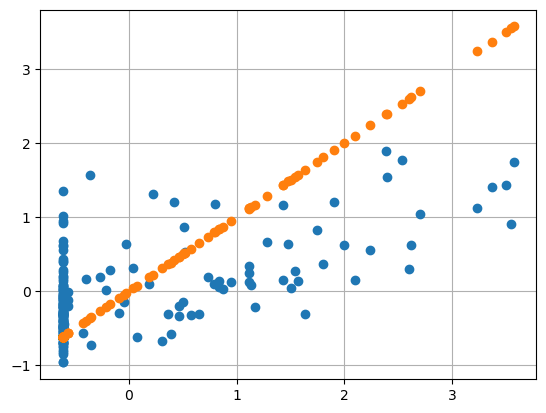

In [12]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [13]:
dtr1 = GridSearchCV (DecisionTreeRegressor(),{
    'criterion':['friedman_mse'], 'random_state':[0,1,2], 'splitter':['best'], 'max_depth':[None]}, cv=5, verbose = 3)
dtr1.fit(X_train,y_train)
#Aqui lo que hacemos es quedarnos con el mejor metodo, el que da mejores resultados, lo llamamos en este caso: model1
model2 = dtr1.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END criterion=friedman_mse, max_depth=None, random_state=0, splitter=best;, score=0.396 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=None, random_state=0, splitter=best;, score=0.246 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=None, random_state=0, splitter=best;, score=0.335 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=None, random_state=0, splitter=best;, score=0.303 total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=None, random_state=0, splitter=best;, score=0.313 total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=None, random_state=1, splitter=best;, score=0.408 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=None, random_state=1, splitter=best;, score=0.352 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=None, random_state=1, splitter=best;, score=0.314 total time=   0.0s
[CV 4/5] END

Primero vemos las metricas
Model| R2 sq on train set: 1.0000
Model| R2 sq on test set: 0.5353
Model| MSE on test set: 0.5065
Model| MAE on test set: 0.3627
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

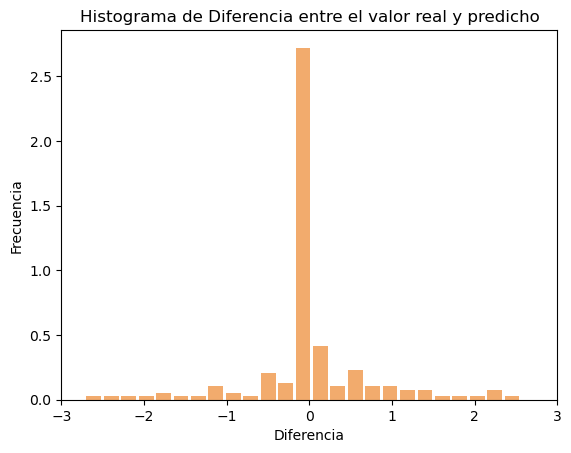

In [14]:
print('Primero vemos las metricas')
abr_score = model2.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model2.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model2.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

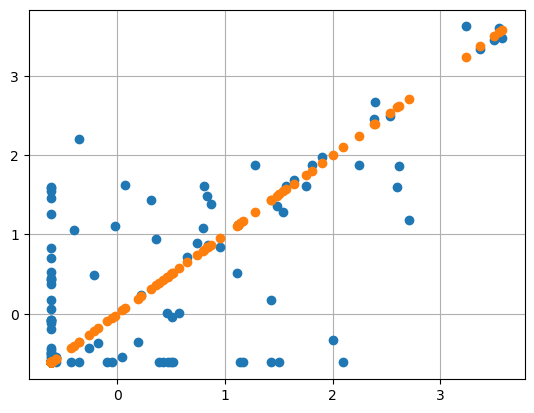

In [15]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [16]:
kernel = 15*RBF(1.0)+10*RBF(2.0)+5*RBF(3.0) #Definimos que tipo de kernel usar, en este caso uno contante de 15 y 2 tipo RBF
gpr1 = make_pipeline(StandardScaler(), GaussianProcessRegressor(kernel = kernel))
gpr1.fit(X_train, y_train) #Entrenamos el modelo
model3 = gpr1

c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Primero vemos las metricas
Model| R2 sq on train set: 1.0000
Model| R2 sq on test set: 0.5287
Model| MSE on test set: 0.5137
Model| MAE on test set: 0.4891
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

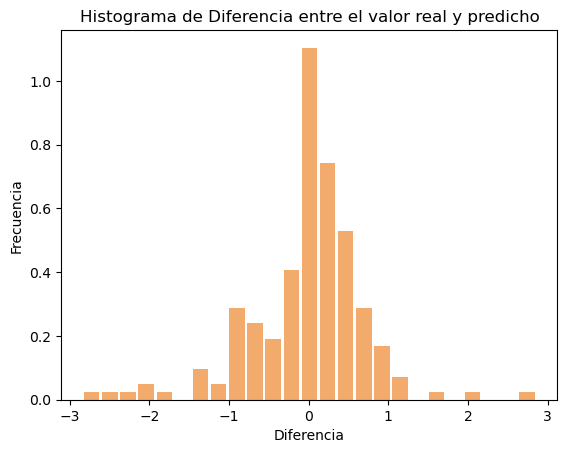

In [17]:
print('Primero vemos las metricas')
abr_score = model3.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model3.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model3.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

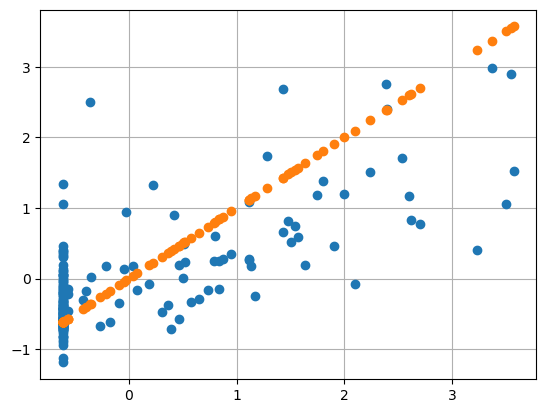

In [18]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [19]:
gbr = GridSearchCV(GradientBoostingRegressor (),{'n_estimators': [100,10,3], 'max_depth': [8], 'min_samples_split': [2], 'learning_rate': [0.1],
    'loss': ['squared_error'], 'random_state':[0,1,2]}, cv=5, verbose = 3)
#loss = 'ls', este es least squares
gbr.fit(X_train, y_train) #Entrenamos el modelo
model4 = gbr.best_estimator_ #Nos quedamos con el mejor modelo

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END learning_rate=0.1, loss=squared_error, max_depth=8, min_samples_split=2, n_estimators=100, random_state=0;, score=0.737 total time=   1.6s
[CV 2/5] END learning_rate=0.1, loss=squared_error, max_depth=8, min_samples_split=2, n_estimators=100, random_state=0;, score=0.658 total time=   1.6s
[CV 3/5] END learning_rate=0.1, loss=squared_error, max_depth=8, min_samples_split=2, n_estimators=100, random_state=0;, score=0.668 total time=   1.6s
[CV 4/5] END learning_rate=0.1, loss=squared_error, max_depth=8, min_samples_split=2, n_estimators=100, random_state=0;, score=0.593 total time=   1.6s
[CV 5/5] END learning_rate=0.1, loss=squared_error, max_depth=8, min_samples_split=2, n_estimators=100, random_state=0;, score=0.522 total time=   1.6s
[CV 1/5] END learning_rate=0.1, loss=squared_error, max_depth=8, min_samples_split=2, n_estimators=100, random_state=1;, score=0.736 total time=   1.6s
[CV 2/5] END learning_rate=0

Primero vemos las metricas
Model| R2 sq on train set: 0.9943
Model| R2 sq on test set: 0.7547
Model| MSE on test set: 0.2673
Model| MAE on test set: 0.3080
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

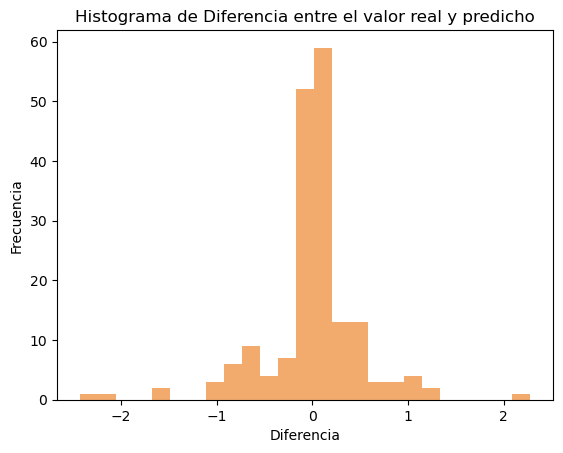

In [20]:
print('Primero vemos las metricas')
abr_score = model4.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model4.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model4.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D')
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
#plt.xticks(range(-3,4))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

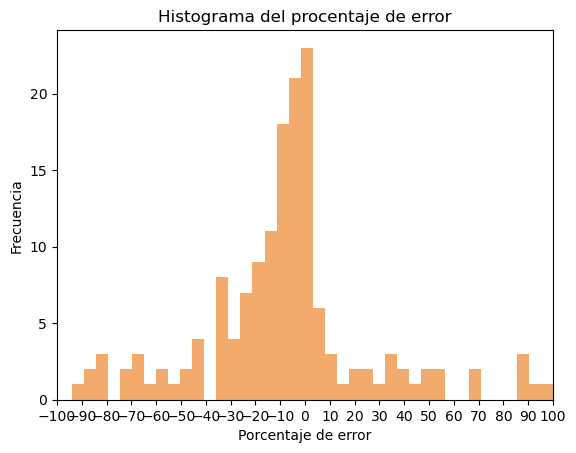

In [21]:
dif1 = (abs(yt - yp) / yt)*100
plt.hist(x=dif1, bins=500, color='#F2AB6D')
plt.title('Histograma del procentaje de error')
plt.xlabel('Porcentaje de error')
plt.ylabel('Frecuencia')
plt.xlim(-100,100)
plt.xticks(range(-100,101,10))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

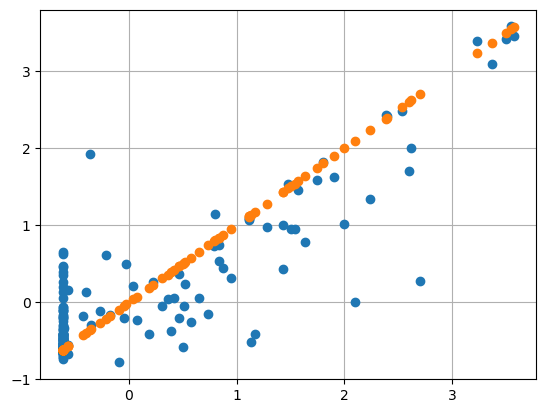

In [22]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [23]:
krr = GridSearchCV (KernelRidge (),{ 'alpha':[0.001],'kernel':['linear']}, cv=5,verbose=3)
krr.fit(X_train, y_train) #Entrenamos el modelo
model5 = krr.best_estimator_ #Nos quedamos con el mejor modelo

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ........alpha=0.001, kernel=linear;, score=0.399 total time=   0.0s
[CV 2/5] END ........alpha=0.001, kernel=linear;, score=0.346 total time=   0.0s
[CV 3/5] END ........alpha=0.001, kernel=linear;, score=0.365 total time=   0.0s
[CV 4/5] END .......alpha=0.001, kernel=linear;, score=-0.109 total time=   0.0s
[CV 5/5] END ........alpha=0.001, kernel=linear;, score=0.379 total time=   0.0s


Primero vemos las metricas
Model| R2 sq on train set: 0.4343
Model| R2 sq on test set: 0.4349
Model| MSE on test set: 0.6160
Model| MAE on test set: 0.5916
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

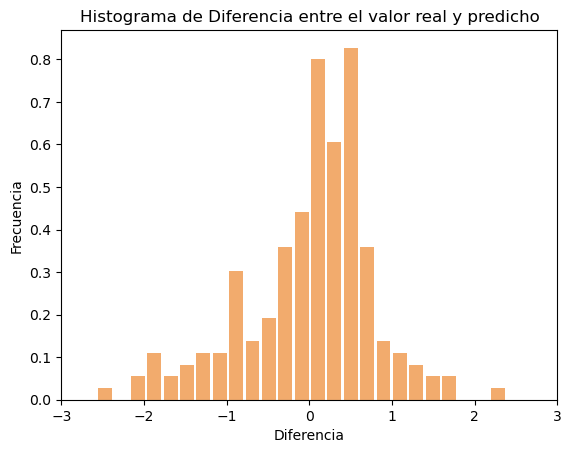

In [24]:
print('Primero vemos las metricas')
abr_score = model5.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model5.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model5.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

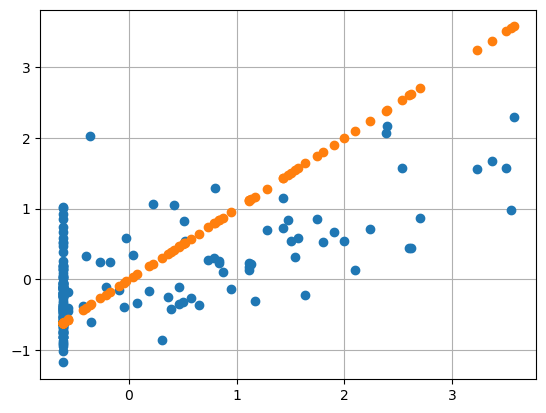

In [25]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [26]:
knr1 = KNeighborsRegressor(n_neighbors = 4, weights = 'distance', algorithm = 'ball_tree')
knr1.fit(X_train, y_train)
model6 = knr1

Primero vemos las metricas
Model| R2 sq on train set: 1.0000
Model| R2 sq on test set: 0.4319
Model| MSE on test set: 0.6193
Model| MAE on test set: 0.4938
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

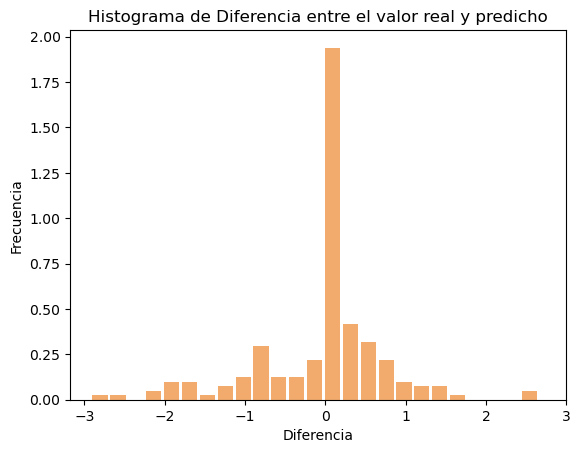

In [27]:
print('Primero vemos las metricas')
abr_score = model6.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model6.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model6.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

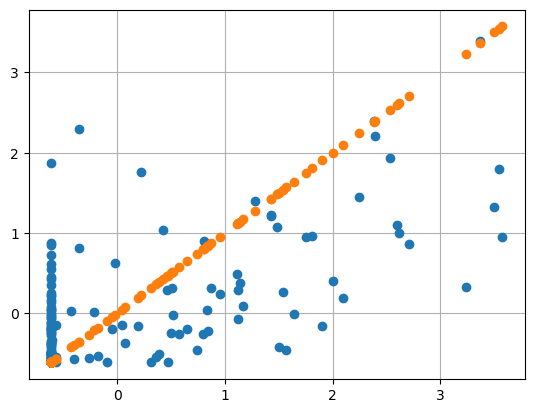

In [28]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [29]:
par = GridSearchCV (PassiveAggressiveRegressor(),{'max_iter':[1000], 'random_state':[10], 'tol':[1e-10]},
                   cv=5,verbose = 3)
#loss = 'ls', este es least squares
par.fit(X_train, y_train) #Entrenamos el modelo
model7 = par.best_estimator_ #Nos quedamos con el mejor modelo

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END max_iter=1000, random_state=10, tol=1e-10;, score=-0.809 total time=   0.0s
[CV 2/5] END max_iter=1000, random_state=10, tol=1e-10;, score=-0.650 total time=   0.0s
[CV 3/5] END max_iter=1000, random_state=10, tol=1e-10;, score=0.097 total time=   0.0s
[CV 4/5] END max_iter=1000, random_state=10, tol=1e-10;, score=-0.081 total time=   0.0s
[CV 5/5] END max_iter=1000, random_state=10, tol=1e-10;, score=-0.267 total time=   0.0s


Primero vemos las metricas
Model| R2 sq on train set: 0.0418
Model| R2 sq on test set: -0.0925
Model| MSE on test set: 1.1908
Model| MAE on test set: 0.8503
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

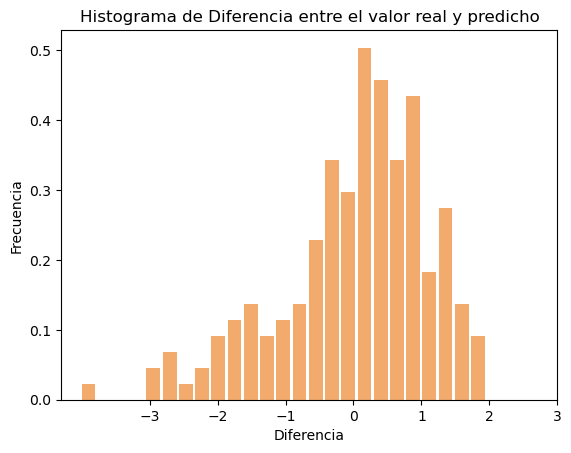

In [30]:
print('Primero vemos las metricas')
abr_score = model7.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model7.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model7.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

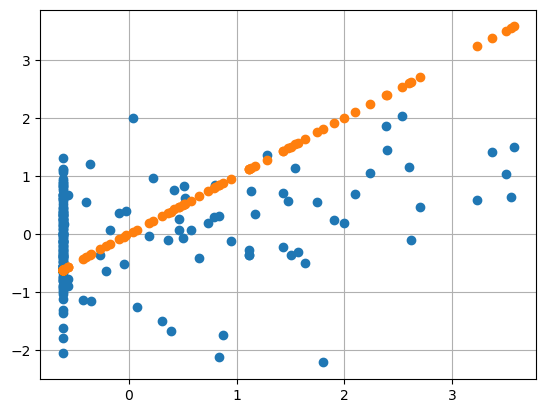

In [31]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [41]:
X_train

,Nsites,Nelements,A Z,A Period_Number,A Group_Number,A Electronegativity,A Covalent_radius,A Valence_Electrons,A Ionization_Energy,A Electron_Afinity,...,X6 Covalent_radius,X6 Valence_Electrons,X6 Ionization_Energy,X6 Electron_Afinity,X6 Block,X6 Volume,X6 Density,X6 Atomic_Weight,volume-py,density-py
25,-0.920080,-0.552907,-0.821722,-0.864229,0.614755,1.390634,-1.451364,-0.375280,1.289069,0.859375,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,-0.813689,0.047271
1285,1.086266,-0.552907,0.576317,0.793308,-0.454817,-0.402111,0.876705,-0.375280,-0.683598,0.396249,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,0.656473,-1.100523
367,-0.920080,-0.552907,-0.262506,-0.035460,-0.668732,-0.126304,0.388098,-0.375280,-0.133066,-0.162396,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,-0.480346,-1.251083
1615,1.086266,1.807630,0.576317,0.793308,-0.454817,-0.402111,0.876705,-0.375280,-0.683598,0.396249,...,1.497710,1.702615,1.726914,2.279874,1.807630,1.156195,1.910338,1.322502,0.264490,0.560053
74,1.086266,-0.552907,1.275337,0.793308,-0.454817,0.057567,-0.043026,-0.375280,0.384930,-1.051020,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,-0.094783,0.628162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,1.086266,-0.552907,-1.427539,-1.692997,1.684327,1.436602,-1.882488,1.374427,1.520240,2.957915,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,-0.238754,-0.943351
501,-0.920080,-0.552907,0.250108,-0.035460,1.684327,1.574505,-1.077723,1.374427,0.829294,2.167707,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,-0.855597,0.452416
638,1.086266,-0.552907,-0.868323,-0.864229,0.400840,1.275714,-1.278914,-0.375280,1.307905,-0.579210,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,-0.159192,-0.326621
348,1.086266,-0.552907,-1.101329,-0.864229,-0.668732,0.195470,-0.186734,-0.375280,0.159751,-0.506846,...,-0.529786,-0.551464,-0.549248,-0.438380,-0.552907,-0.512715,-0.533352,-0.502199,-0.056424,0.961690


In [32]:
grid1 = GridSearchCV (RandomForestRegressor(),{'max_depth':[100], 'random_state':[0,1,2], 'criterion':['squared_error']
                                             }, cv=5, refit=True, verbose=3)
grid1.fit(X_train,y_train)
#Aqui lo que hacemos es quedarnos con el mejor metodo, el que da mejores resultados, lo llamamos en este caso: model1
model8 = grid1.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END criterion=squared_error, max_depth=100, random_state=0;, score=0.734 total time=   1.8s
[CV 2/5] END criterion=squared_error, max_depth=100, random_state=0;, score=0.649 total time=   1.9s
[CV 3/5] END criterion=squared_error, max_depth=100, random_state=0;, score=0.608 total time=   1.7s
[CV 4/5] END criterion=squared_error, max_depth=100, random_state=0;, score=0.622 total time=   1.8s
[CV 5/5] END criterion=squared_error, max_depth=100, random_state=0;, score=0.578 total time=   1.7s
[CV 1/5] END criterion=squared_error, max_depth=100, random_state=1;, score=0.742 total time=   1.7s
[CV 2/5] END criterion=squared_error, max_depth=100, random_state=1;, score=0.635 total time=   1.7s
[CV 3/5] END criterion=squared_error, max_depth=100, random_state=1;, score=0.625 total time=   1.7s
[CV 4/5] END criterion=squared_error, max_depth=100, random_state=1;, score=0.625 total time=   1.8s
[CV 5/5] END criterion=squared_

Primero vemos las metricas
Model| R2 sq on train set: 0.9530
Model| R2 sq on test set: 0.7656
Model| MSE on test set: 0.2555
Model| MAE on test set: 0.3418
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

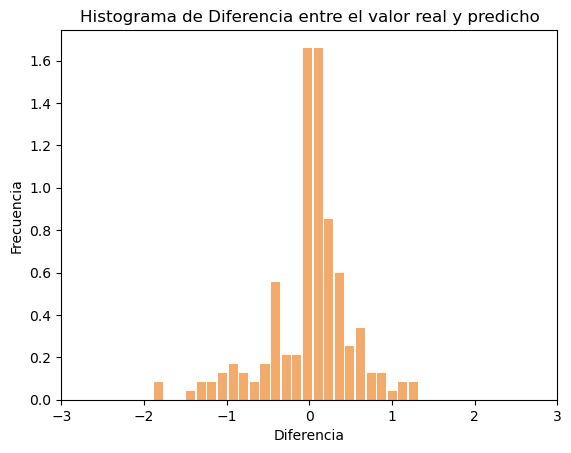

In [33]:
print('Primero vemos las metricas')
abr_score = model8.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model8.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model8.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

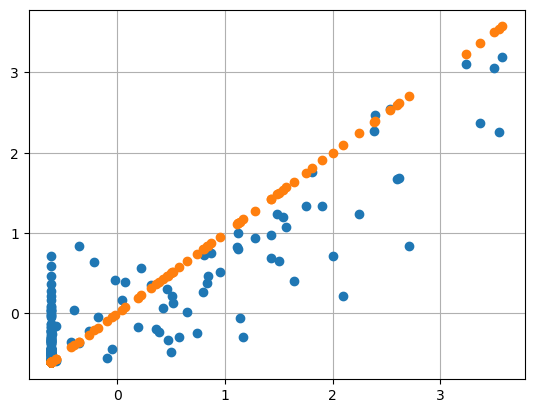

In [34]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [35]:
sgd = (make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000,tol=1e-1500,alpha=0.0001,epsilon=0.0001)))
sgd.fit(X_train, y_train) #Entrenamos el modelo
model9 = sgd #Nos quedamos con el mejor modelo

Primero vemos las metricas
Model| R2 sq on train set: -7482733.8876
Model| R2 sq on test set: -428743.5787
Model| MSE on test set: 467344.9326
Model| MAE on test set: 487.2987
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

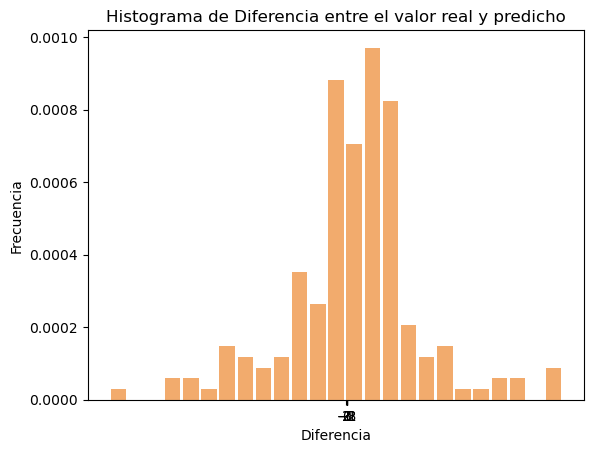

In [36]:
print('Primero vemos las metricas')
abr_score = model9.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model9.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model9.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

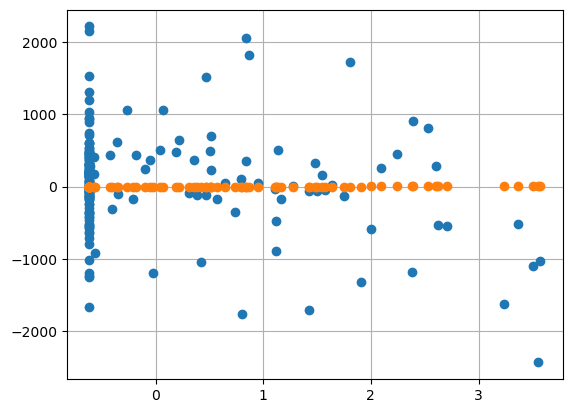

In [37]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [38]:
steps1 = [('scaler', StandardScaler()), ('SVM', SVR())]
pipeline1 = Pipeline(steps1) 
grid1 = GridSearchCV(pipeline1, param_grid= {'SVM__C':[100], 'SVM__gamma':['auto'], 'SVM__kernel': ['rbf'],
                                           'SVM__epsilon':[0.001]},cv = 5, refit=True,verbose=3, n_jobs = -1)
grid1.fit(X_train,y_train)
#Aqui lo que hacemos es quedarnos con el mejor metodo, el que da mejores resultados, lo llamamos en este caso: model1
model10 = grid1.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


Primero vemos las metricas
Model| R2 sq on train set: 0.7542
Model| R2 sq on test set: 0.5346
Model| MSE on test set: 0.5073
Model| MAE on test set: 0.4106
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

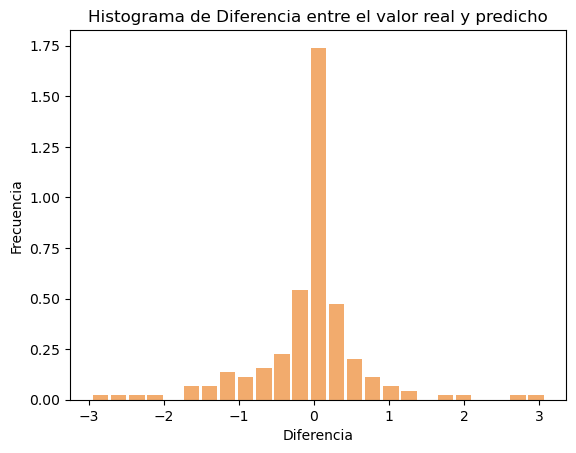

In [39]:
print('Primero vemos las metricas')
abr_score = model10.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model10.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model10.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

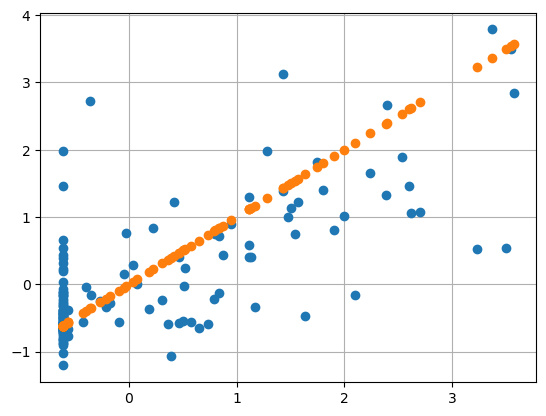

In [40]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show